# Imports and data loading

In [1]:
import warnings

warnings.filterwarnings("ignore")
import scanpy as sc
import pertpy as pt

Global seed set to 0
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.


To use sccoda or tasccoda please install ete3 with pip install ete3

In [2]:
adata = sc.read("/home/p/pohll/Desktop/MP/data/galapagos_bleo_new_dr_leiden.h5ad")

In [7]:
adata.obs["SAMP_condition"]

1_Sal_veh_d21_AAACCCAAGACATATG-1    SHAM
1_Sal_veh_d21_AAACCCAGTATTCTCT-1    SHAM
1_Sal_veh_d21_AAACCCATCCGCTGTT-1    SHAM
1_Sal_veh_d21_AAACGCTAGCGGGTTA-1    SHAM
1_Sal_veh_d21_AAAGGATGTCCGGTCA-1    SHAM
                                    ... 
9_Sal_veh_d21_TTTGGTTTCGTTACCC-1    SHAM
9_Sal_veh_d21_TTTGTTGAGTCAGAGC-1    SHAM
9_Sal_veh_d21_TTTGTTGGTCATACCA-1    SHAM
9_Sal_veh_d21_TTTGTTGTCTCCTACG-1    SHAM
9_Sal_veh_d21_TTTGTTGTCTGGAGAG-1    SHAM
Name: SAMP_condition, Length: 104966, dtype: category
Categories (2, object): ['BLM', 'SHAM']

adata needs "celltype" and "label" as columns of adata.obs --> add 

In [9]:
adata.obs["cell_type"] = adata.obs["manual_celltype_annotation_fine_leiden03"] 
adata.obs["label"] = adata.obs["SAMP_condition"]

In [10]:
#random_forest_classifier or logistic_regression_classifier for categorical data 
ag_rfc = pt.tl.Augur("random_forest_classifier")
loaded_data = ag_rfc.load(adata)

# Augur using highly variable genes 

In [11]:
h_adata, h_results = ag_rfc.predict(loaded_data, subsample_size=20, n_threads=4)

print(h_results["summary_metrics"])

Set smaller span value in the case of a `segmentation fault` error.

Set larger span in case of svddc or other near singularities error.

Output()

Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v

To use sccoda or tasccoda please install ete3 with pip install ete3
To use sccoda or tasccoda please install ete3 with pip install ete3
To use sccoda or tasccoda please install ete3 with pip install ete3
To use sccoda or tasccoda please install ete3 with pip install ete3


Skipping Erythroid cells cell type - the number of samples for at least one class type is less than subsample size 
20.

                  CD4 T-cells   B-cells  Dendritic cells  CD8 T-cells  \
mean_augur_score     0.513787  0.521905         0.588050     0.559615   
mean_auc             0.513787  0.521905         0.588050     0.559615   
mean_accuracy        0.491575  0.510513         0.543370     0.535128   
mean_precision       0.493847  0.514364         0.556975     0.573802   
mean_f1              0.439126  0.459377         0.503790     0.459119   
mean_recall          0.450317  0.476667         0.500476     0.434603   

                  Endothelial  Alveolar macrophages  Classical monocytes  \
mean_augur_score     0.650760              0.643424             0.528333   
mean_auc             0.650760              0.643424             0.528333   
mean_accuracy        0.601136              0.593480             0.515678   
mean_precision       0.590731              0.605677             0.526299   
mean_f1              0.639075              0.562651             0.480618   
mean_recall          0.734921   

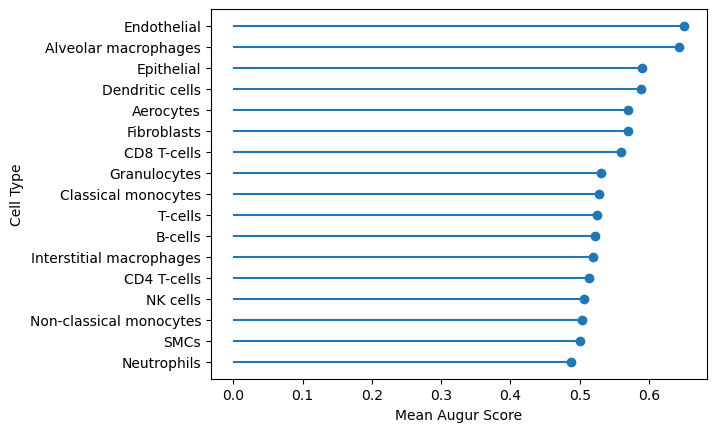

In [12]:
lollipop = pt.pl.ag.lollipop(h_results)

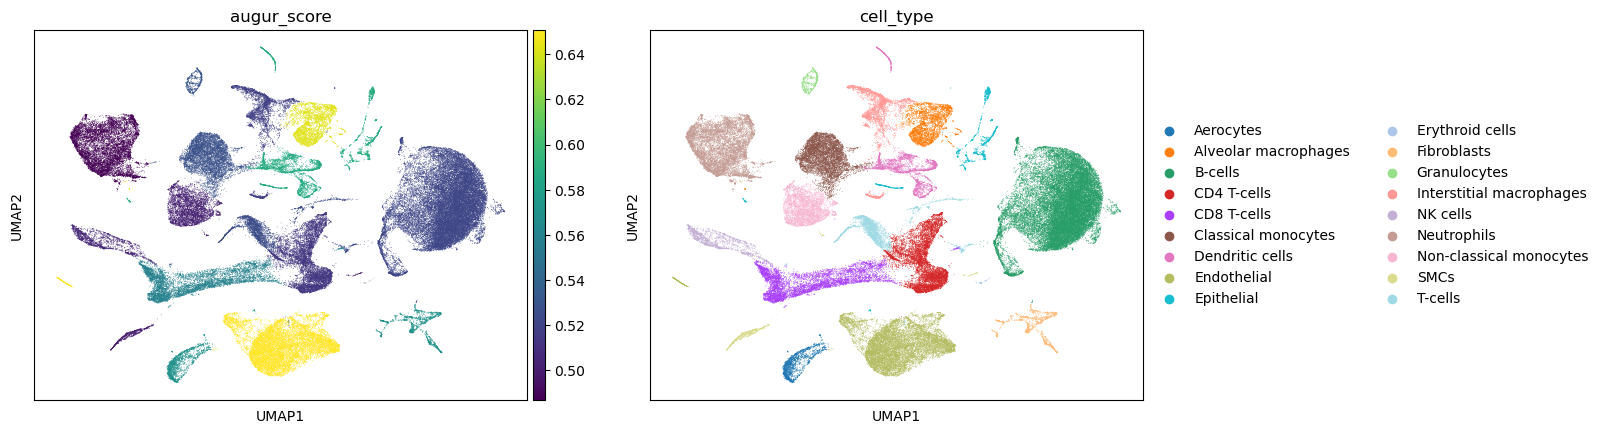

In [14]:
sc.pl.umap(adata=h_adata, color=["augur_score", "cell_type"])

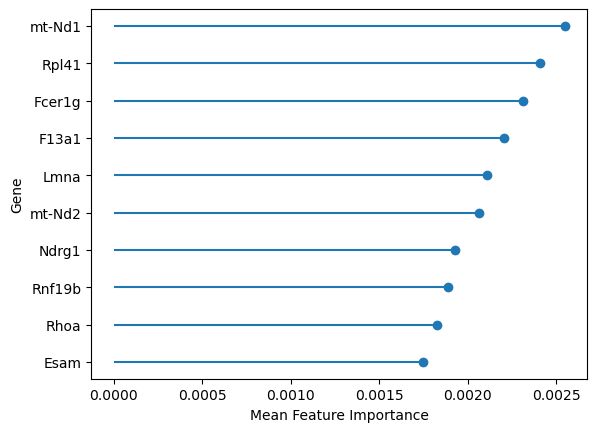

In [15]:
important_features = pt.pl.ag.important_features(h_results)